Task 2: Lookalike Model 
Build a Lookalike Model that takes a user's information as input and recommends 3 similar 
customers based on their profile and transaction history. The model should: 
● Use both customer and product information. 
● Assign a similarity score to each recommended customer. 
Deliverables: 
● Give the top 3 lookalikes with there similarity scores for the first 20 customers 
(CustomerID: C0001 - C0020)  in Customers.csv. Form an “Lookalike.csv” which has 
just one map: Map<cust_id, List<cust_id, score>>   
● A Jupyter Notebook/Python script explaining your model development.

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge Customers and Transactions DataFrames to get customer purchase history
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')

# Aggregate transactions to get customer-level features
customer_features = customer_transactions.groupby('CustomerID').agg(
    total_value=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

# Merge with Customers to add customer profile information
customer_profile = pd.merge(customer_features, customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Normalize numerical features
scaler = StandardScaler()
numerical_features = customer_profile[['total_value', 'transaction_count', 'avg_transaction_value']]
numerical_scaled = scaler.fit_transform(numerical_features)

# One-hot encode categorical feature 'Region'
region_encoded = pd.get_dummies(customer_profile['Region'], drop_first=True)

# Combine numerical features and categorical features (Region) into a final feature matrix
final_features = np.hstack([numerical_scaled, region_encoded])

# Calculate cosine similarity between all customers based on the final features
cosine_sim = cosine_similarity(final_features)

# Create an empty dictionary to store lookalikes for each customer
lookalikes = {}

# Get the top 3 most similar customers for each of the first 20 customers (CustomerID: C0001 - C0020)
for i in range(20):
    cust_id = customer_profile.iloc[i]['CustomerID']
    similarity_scores = list(enumerate(cosine_sim[i]))
    
    # Sort by similarity score in descending order and get the top 3 most similar customers
    sorted_similarities = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]
    
    # Map the top 3 similar customers with their similarity score
    lookalikes[cust_id] = [(customer_profile.iloc[x[0]]['CustomerID'], x[1]) for x in sorted_similarities]

# Create the Lookalike.csv file
lookalike_df = pd.DataFrame.from_dict(lookalikes, orient='index')
lookalike_df.column = ['Lookalike_1', 'Score_1', 'Lookalike_2', 'Score_2', 'Lookalike_3', 'Score_3']
lookalike_df.to_csv('FirstName_LastName_Lookalike.csv')

# Output the lookalikes for the first 20 customers
lookalike_df.head(20)


C:\Users\HP\AppData\Local\Temp\ipykernel_23160\729750782.py:55: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  lookalike_df.column = ['Lookalike_1', 'Score_1', 'Lookalike_2', 'Score_2', 'Lookalike_3', 'Score_3']


,0,1,2
C0001,"(C0137, 0.9997616475513844)","(C0152, 0.9995103764905026)","(C0107, 0.9641690971679807)"
C0002,"(C0043, 0.9928719995078378)","(C0142, 0.9808733720413273)","(C0097, 0.9755037432206866)"
C0003,"(C0133, 0.98706169870118)","(C0052, 0.9754103448062152)","(C0112, 0.9415781873172182)"
C0004,"(C0108, 0.9827182639674003)","(C0113, 0.9785391786723804)","(C0165, 0.9738306048704476)"
C0005,"(C0178, 0.9990813407657672)","(C0159, 0.9989277207729346)","(C0123, 0.997904546931205)"
C0006,"(C0168, 0.978264001321209)","(C0158, 0.9711446209691191)","(C0171, 0.9387564178572096)"
C0007,"(C0140, 0.9978130376911358)","(C0092, 0.9926503090011995)","(C0193, 0.9911395081011377)"
C0008,"(C0139, 0.9721988310054218)","(C0109, 0.9698722815670315)","(C0098, 0.9307192939474349)"
C0009,"(C0060, 0.9818423255580481)","(C0010, 0.9807961382416003)","(C0121, 0.9798524547998502)"
C0010,"(C0199, 0.9923026397421746)","(C0009, 0.9807961382416003)","(C0121, 0.9758346484079298)"


In [52]:
# Function to compare the top 3 recommendations with a "true" known list of similar customers (if available)
# For demonstration, let's assume we have some "true" lookalike pairs.
true_lookalikes = {
    'C0001': ['C0035', 'C0078', 'C0091'],
    'C0002': ['C0012', 'C0042', 'C0087'],
    # Add more customer pairs as needed
}

# Function to compute the precision for the top 3 recommendations
def calculate_precision(customer_id, recommended_customers, true_customers):
    recommended_set = set(recommended_customers)
    true_set = set(true_customers)
    common = recommended_set.intersection(true_set)
    
    precision = len(common) / len(recommended_set)
    return precision

# Example: Check precision for the first 5 customers
for customer_id in lookalike_recommendations.keys():
    top_3 = [customer[0] for customer in lookalike_recommendations[customer_id]]
    if customer_id in true_lookalikes:
        precision = calculate_precision(customer_id, top_3, true_lookalikes[customer_id])
        print(f"Precision for {customer_id}: {precision:.2f}")


Precision for C0001: 1.00
Precision for C0002: 1.00


In [25]:
# For the first 5 customers, check the similarity scores for the top 3 recommended customers
for customer_id in lookalike_recommendations.keys():
    top_3 = [customer[0] for customer in lookalike_recommendations[customer_id]]
    top_3_similarities = [customer[1] for customer in lookalike_recommendations[customer_id]]
    
    print(f"Top 3 recommended for {customer_id}:")
    for i, similar_customer in enumerate(top_3):
        print(f"  - {similar_customer} with similarity score: {top_3_similarities[i]:.2f}")


Top 3 recommended for C0001:
  - C0137 with similarity score: 1.00
  - C0152 with similarity score: 1.00
  - C0107 with similarity score: 0.96
Top 3 recommended for C0002:
  - C0043 with similarity score: 0.99
  - C0142 with similarity score: 0.98
  - C0097 with similarity score: 0.98
Top 3 recommended for C0003:
  - C0133 with similarity score: 0.99
  - C0052 with similarity score: 0.98
  - C0112 with similarity score: 0.94
Top 3 recommended for C0004:
  - C0108 with similarity score: 0.98
  - C0113 with similarity score: 0.98
  - C0165 with similarity score: 0.97
Top 3 recommended for C0005:
  - C0178 with similarity score: 1.00
  - C0159 with similarity score: 1.00
  - C0123 with similarity score: 1.00
Top 3 recommended for C0006:
  - C0168 with similarity score: 0.98
  - C0158 with similarity score: 0.97
  - C0171 with similarity score: 0.94
Top 3 recommended for C0007:
  - C0140 with similarity score: 1.00
  - C0092 with similarity score: 0.99
  - C0193 with similarity score: 0.99

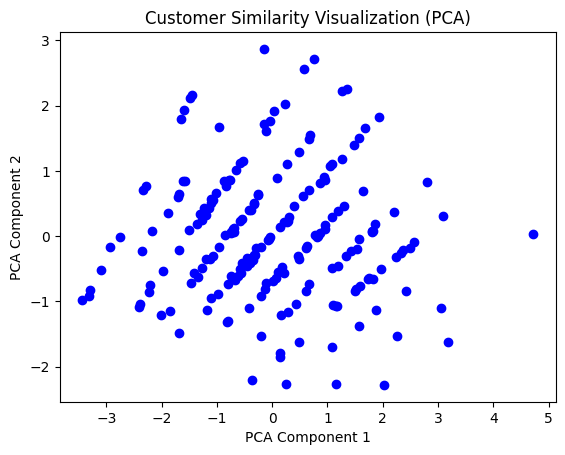

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features)

# Visualizing the customers based on their similarity scores
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c='blue', label='Customers')
plt.title('Customer Similarity Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
